# Exercise Sheet 9

In [1]:
import numpy as np
import itertools
import scipy.misc
import matplotlib.pyplot as plt
import sympy as sym

Link: [Branes with Brains: Exploring String Vacua with Deep Reinforcement Learning](https://arxiv.org/abs/1903.11616)

## Gridworld

* For a 5x5 Gridworld with no pitfalls and no exit, assume that we go up, down, left, right with equal probability. If we try to move over the boundary we remain at the same position. Write down the dynamics/transition probabilities explicitly.
* Using these probabilities generate 10 sample episodes.
* Calculate the reward $G_t$ for each of these samples (assuming that you get a reward of 5 in the central pixel and 1 in each corner).
* Calculate $V(s)$ for all states using the Bellman equation and via dynamic programming.
* How many non-vanishing entries can be found in each row of $P$ in a Markov Decision Process if the actions are deterministic?

### Solution

In [2]:
##Exercise 1 a)

# random position in gridworld
X = np.random.randint(0,5,2)

# dynamics:
def step(X, direction):
    if (direction == 'north' and X[1] != 4):
        X[1]+=1
    if (direction == 'east' and X[0] != 4):
        X[0]+=1
    if (direction == 'south' and X[1] != 0):
        X[1]-=1
    if (direction == 'west' and X[0] != 0):
        X[0]-=1
    return X

def randomdirection():
    return np.random.choice(['north', 'east', 'south', 'west'])

def localreward(X):
    if (np.all(X==[0,0]) or np.all(X==[4,0]) or np.all(X==[0,4]) or np.all(X==[4,4])):
        return 1
    else:
        if np.all(X==[2,2]):
            return 5
        else:
            return 0

def run(X, epochs):
    hist = np.empty([epochs, 2])
    for i in range(epochs):
        hist[i] = X
        X = step(X, randomdirection())
    return hist

def reward(hist, gamma=0.9):
    return sum([localreward(X)*gamma**i for i, X in enumerate(hist)])

In [3]:
##Exercise 1 b)
histories = [run(np.random.randint(0,5,2),1000) for i in range(10)]

##Exercise 1 c)
## gamma=1 or gamma=0.9 accepted
rewards = [reward(hist,gamma=1.) for hist in histories]
print(rewards)
print()
rewards = [reward(hist,gamma=.9) for hist in histories]
print(rewards)

[348.0, 337.0, 311.0, 396.0, 297.0, 386.0, 343.0, 433.0, 334.0, 383.0]

[3.222164529148538, 2.5463821704697778, 1.7385924448741612, 2.214320034338979, 2.1928853188651978, 1.032757862546746, 10.25181400486201, 5.689212812042351, 3.8631685822141564, 0.6817804509740786]


##Exercise 1 d)

##Two possible Solutions:

Use Bellman equation

In [5]:
gamma = sym.Rational(9,10)
p = sym.Rational(1,4)

In [6]:
V = sym.IndexedBase('V')
i, j = sym.symbols('i j', cls=sym.Idx)

In [7]:
eqns = [0 for _ in range(25)]
for k, (i, j) in enumerate(itertools.product(range(5), range(5))):
    eqns[k] = V[i,j]-p*sum([localreward(step([i,j],direction))
                            +gamma*V[tuple(step([i,j],direction))] 
                            for direction in ('north', 'east', 'south', 'west')])

In [8]:
eqns

[11*V[0, 0]/20 - 9*V[0, 1]/40 - 9*V[1, 0]/40 - 1/2,
 -9*V[0, 0]/40 + 31*V[0, 1]/40 - 9*V[0, 2]/40 - 9*V[1, 1]/40 - 1/4,
 -9*V[0, 1]/40 + 31*V[0, 2]/40 - 9*V[0, 3]/40 - 9*V[1, 2]/40,
 -9*V[0, 2]/40 + 31*V[0, 3]/40 - 9*V[0, 4]/40 - 9*V[1, 3]/40 - 1/4,
 -9*V[0, 3]/40 + 11*V[0, 4]/20 - 9*V[1, 4]/40 - 1/2,
 -9*V[0, 0]/40 + 31*V[1, 0]/40 - 9*V[1, 1]/40 - 9*V[2, 0]/40 - 1/4,
 -9*V[0, 1]/40 - 9*V[1, 0]/40 + V[1, 1] - 9*V[1, 2]/40 - 9*V[2, 1]/40,
 -9*V[0, 2]/40 - 9*V[1, 1]/40 + V[1, 2] - 9*V[1, 3]/40 - 9*V[2, 2]/40 - 5/4,
 -9*V[0, 3]/40 - 9*V[1, 2]/40 + V[1, 3] - 9*V[1, 4]/40 - 9*V[2, 3]/40,
 -9*V[0, 4]/40 - 9*V[1, 3]/40 + 31*V[1, 4]/40 - 9*V[2, 4]/40 - 1/4,
 -9*V[1, 0]/40 + 31*V[2, 0]/40 - 9*V[2, 1]/40 - 9*V[3, 0]/40,
 -9*V[1, 1]/40 - 9*V[2, 0]/40 + V[2, 1] - 9*V[2, 2]/40 - 9*V[3, 1]/40 - 5/4,
 -9*V[1, 2]/40 - 9*V[2, 1]/40 + V[2, 2] - 9*V[2, 3]/40 - 9*V[3, 2]/40,
 -9*V[1, 3]/40 - 9*V[2, 2]/40 + V[2, 3] - 9*V[2, 4]/40 - 9*V[3, 3]/40 - 5/4,
 -9*V[1, 4]/40 - 9*V[2, 3]/40 + 31*V[2, 4]/40 - 9*V[3, 

Throw this at Mathematica or your favorite symbolic computation software...get:

In [9]:
V = np.array([[3.63686, 3.33395, 3.22976, 3.33395, 3.63686],[3.33395, 3.50585, 4.45684, 3.50585, 3.33395],[3.22976, 4.45684, 4.01116, 4.45684, 3.22976],[3.33395, 3.50585, 4.45684, 3.50585, 3.33395],[3.63686, 3.33395, 3.22976, 3.33395, 3.63686]])
print(V)

[[3.63686 3.33395 3.22976 3.33395 3.63686]
 [3.33395 3.50585 4.45684 3.50585 3.33395]
 [3.22976 4.45684 4.01116 4.45684 3.22976]
 [3.33395 3.50585 4.45684 3.50585 3.33395]
 [3.63686 3.33395 3.22976 3.33395 3.63686]]


Dynamic Programming:

In [10]:
V = np.array(np.ones([5,5]))
updates = np.array(np.ones([5,5]))
gamma = 0.9

In [11]:
for _ in range(500):
    for i, j in itertools.product(range(5), range(5)):
        updates[i,j] =  p*sum([localreward(step([i,j],direction))+gamma*V[tuple(step([i,j],direction))]
                        for direction in ('north', 'east', 'south', 'west')])
    for i, j in itertools.product(range(5), range(5)):
        V[i,j] = updates[i,j]

V

array([[3.63686455, 3.33394556, 3.22976082, 3.33394556, 3.63686455],
       [3.33394556, 3.50585377, 4.45684061, 3.50585377, 3.33394556],
       [3.22976082, 4.45684061, 4.01115655, 4.45684061, 3.22976082],
       [3.33394556, 3.50585377, 4.45684061, 3.50585377, 3.33394556],
       [3.63686455, 3.33394556, 3.22976082, 3.33394556, 3.63686455]])

The two results coincide.

## Gridworld 2

Based on the gridworld example code from the lectures, try to address the following questions:
* Visualise the time evolution of the state value function $Q$.
* Augment the gridworld to 25x25 and implement the other updating function Q-learning instead of SARSA.
* Compare the time evolution of random learning, SARSA, and Q-learning.

### Solution

In [12]:
import gridworld
import helperFunctions

In [13]:
agent = gridworld.GameEnv()
agent.close_world_display()

all_states = []
for x in range(agent.sizeX):
    for y in range(agent.sizeY):
        all_states.append((x, y))
        
# Q is a dictionary that contains the rewards for all four actions that can be performed in any given square of Gridworld.
# Initialize Q and keep track of how many times Q[s] has been updated
Q = {}
QhistSARSA = []
update_counts_sa = {}
for s in all_states:
    update_counts_sa[s] = {}
    Q[s] = {}
    for a in agent.action_space:
        update_counts_sa[s][a] = 1.0
        Q[s][a] = 0.0
        
# save history into array
Qarr = np.array([[x for x in field.values()] for field in [a for a in Q.values()]]).reshape([agent.sizeX,agent.sizeY,-1])
QhistSARSA.append(Qarr)


gamma = 0.9  # discount factor
alpha_W = 0.1  # learning rate
t = 1.0  # count time

training_episodes = 10000
for i in range(training_episodes):
    if i % 100 == 0:
        t += 0.01
    agent.reset()
    found_initial_move = False
    current_action = None
    current_state = agent.get_state()
    while not found_initial_move:
        current_action = helperFunctions.random_action(None, agent.action_space, eps=1)
        found_initial_move = agent.is_possible_action(current_action)
    done = False

    # loop until done (i.e. solved the maze or gave up)
    while not done:
        # perform current step and get the next state, the reward/penalty for the move, and whether the agent is done (solved or gave up)
        next_state, reward, done = agent.step(current_action, False)

        # get the best currently known action for the state we are in now
        next_action = helperFunctions.get_best_action(Q[current_state])[0]
        # randomize action to allow for exploration. As time progresses, make random actions less likely.
        next_action = helperFunctions.random_action(next_action, agent.action_space, eps=0.4/t)

        # Update Q
        alpha = alpha_W / update_counts_sa[current_state][current_action]
        update_counts_sa[current_state][current_action] += 0.005
        Q[current_state][current_action] = Q[current_state][current_action] + alpha * (reward + gamma * Q[next_state][next_action] - Q[current_state][current_action])
        # save history into array
        Qarr = np.array([[x for x in field.values()] for field in [a for a in Q.values()]]).reshape([agent.sizeX,agent.sizeY,-1])
        QhistSARSA.append(Qarr)
        
        # update current state, current action, and start over
        current_state = next_state
        current_action = next_action
agent.reset()
plt.close('all')

In [14]:
def heat_plot(array, ax, title='', toggle_numbers = True):
    im = ax.imshow(array, cmap='hot')
    ax.set_title(title)
    if toggle_numbers:
        for i in range(array.shape[0]):
            for j in range(array.shape[1]):
                text = ax.text(j, i, round(array[i, j],1), ha="center", va="center", color="g")

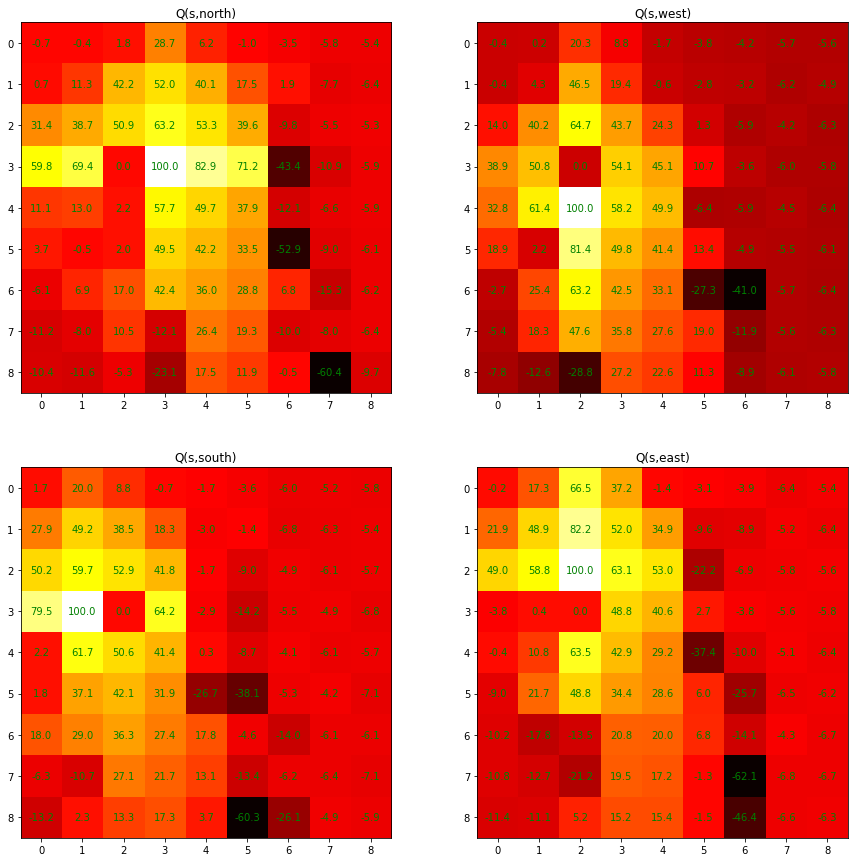

In [15]:
fig, ax = plt.subplots(2,2, figsize=(15,15))

heat_plot(Qarr[:,:,0], ax[0,0], 'Q(s,north)')
heat_plot(Qarr[:,:,1], ax[1,0], 'Q(s,south)')
heat_plot(Qarr[:,:,2], ax[0,1], 'Q(s,west)')
heat_plot(Qarr[:,:,3], ax[1,1], 'Q(s,east)')

plt.show()

History:

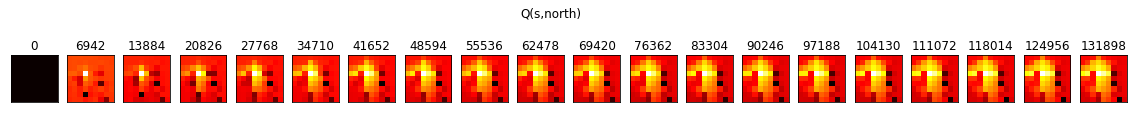

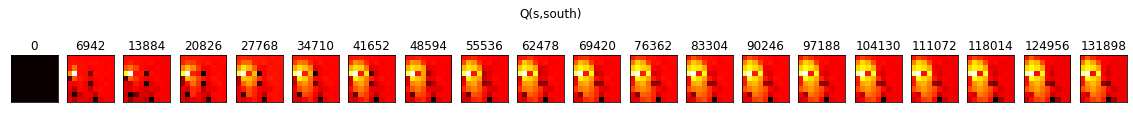

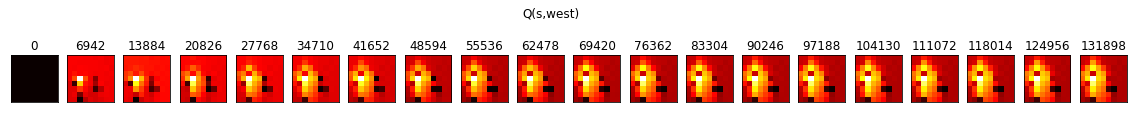

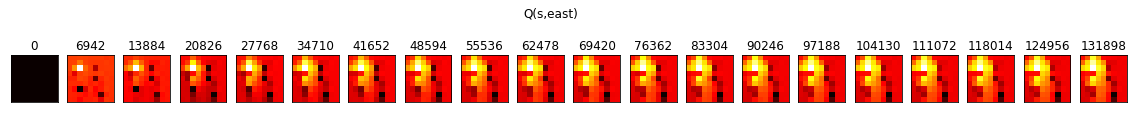

In [16]:
Nsteps = 20
direction = {0: 'north', 1: 'south', 2: 'west', 3: 'east'}
for intdir in range(4):
    fig, ax = plt.subplots(1, Nsteps, figsize=(20,1))
    title = 'Q(s,{})'.format(direction[intdir])
    fig.suptitle(title,y=1.5)

    for i in range(Nsteps):
        interval = len(QhistSARSA)//Nsteps
        heat_plot(QhistSARSA[interval*i][:,:,intdir], ax[i], title='', toggle_numbers = False)
        ax[i].set_title(str(i*interval))
        ax[i].set_xticks([])
        ax[i].set_yticks([])
    plt.show()

25x25 grid and implement Q-learning

In [17]:
# SARSA

agent = gridworld.GameEnv()
agent.close_world_display()
# change size:
agent.sizeX = 25
agent.sizeY = 25

all_states = []
for x in range(agent.sizeX):
    for y in range(agent.sizeY):
        all_states.append((x, y))
        
# Q is a dictionary that contains the rewards for all four actions that can be performed in any given square of Gridworld.
# Initialize Q and keep track of how many times Q[s] has been updated
Q = {}
QhistSARSA = []
update_counts_sa = {}
for s in all_states:
    update_counts_sa[s] = {}
    Q[s] = {}
    for a in agent.action_space:
        update_counts_sa[s][a] = 1.0
        Q[s][a] = 0.0
        
# save history into array
Qarr = np.array([[x for x in field.values()] for field in [a for a in Q.values()]]).reshape([agent.sizeX,agent.sizeY,-1])
QhistSARSA.append(Qarr)


gamma = 0.9  # discount factor
alpha_W = 0.1  # learning rate
t = 1.0  # count time

training_episodes = 10000
for i in range(training_episodes):
    if i % 100 == 0:
        t += 0.01
    agent.reset()
    found_initial_move = False
    current_action = None
    current_state = agent.get_state()
    while not found_initial_move:
        current_action = helperFunctions.random_action(None, agent.action_space, eps=1)
        found_initial_move = agent.is_possible_action(current_action)
    done = False

    # loop until done (i.e. solved the maze or gave up)
    while not done:
        # perform current step and get the next state, the reward/penalty for the move, and whether the agent is done (solved or gave up)
        next_state, reward, done = agent.step(current_action, False)

        # get the best currently known action for the state we are in now
        next_action = helperFunctions.get_best_action(Q[current_state])[0]
        # randomize action to allow for exploration. As time progresses, make random actions less likely.
        next_action = helperFunctions.random_action(next_action, agent.action_space, eps=0.4/t)
        
        # Update Q
        # _____CHANGES IMPLEMENTED HERE_____
        alpha = alpha_W / update_counts_sa[current_state][current_action]
        update_counts_sa[current_state][current_action] += 0.005
        Q[current_state][current_action] = Q[current_state][current_action] + alpha * (reward + gamma * Q[next_state][next_action] - Q[current_state][current_action])
        # save history into array
        Qarr = np.array([[x for x in field.values()] for field in [a for a in Q.values()]]).reshape([agent.sizeX,agent.sizeY,-1])
        QhistSARSA.append(Qarr)
        
        # update current state, current action, and start over
        current_state = next_state
        current_action = next_action
agent.reset()
plt.close('all')

In [18]:
# Q-Learning

agent = gridworld.GameEnv()
agent.close_world_display()
# change size:
agent.sizeX = 25
agent.sizeY = 25

all_states = []
for x in range(agent.sizeX):
    for y in range(agent.sizeY):
        all_states.append((x, y))
        
# Q is a dictionary that contains the rewards for all four actions that can be performed in any given square of Gridworld.
# Initialize Q and keep track of how many times Q[s] has been updated
Q = {}
QhistQlearn = []
update_counts_sa = {}
for s in all_states:
    update_counts_sa[s] = {}
    Q[s] = {}
    for a in agent.action_space:
        update_counts_sa[s][a] = 1.0
        Q[s][a] = 0.0
        
# save history into array
Qarr = np.array([[x for x in field.values()] for field in [a for a in Q.values()]]).reshape([agent.sizeX,agent.sizeY,-1])
QhistQlearn.append(Qarr)


gamma = 0.9  # discount factor
alpha_W = 0.1  # learning rate
t = 1.0  # count time

training_episodes = 10000
for i in range(training_episodes):
    if i % 100 == 0:
        t += 0.01
    agent.reset()
    found_initial_move = False
    current_action = None
    current_state = agent.get_state()
    while not found_initial_move:
        current_action = helperFunctions.random_action(None, agent.action_space, eps=1)
        found_initial_move = agent.is_possible_action(current_action)
    done = False

    # loop until done (i.e. solved the maze or gave up)
    while not done:
        # perform current step and get the next state, the reward/penalty for the move, and whether the agent is done (solved or gave up)
        next_state, reward, done = agent.step(current_action, False)

        # get the best currently known action for the state we are in now
        next_action = helperFunctions.get_best_action(Q[current_state])[0]
        # randomize action to allow for exploration. As time progresses, make random actions less likely.
        next_action = helperFunctions.random_action(next_action, agent.action_space, eps=0.4/t)
        
        # Update Q
        # _____CHANGES IMPLEMENTED HERE_____
        alpha = alpha_W / update_counts_sa[current_state][current_action]
        update_counts_sa[current_state][current_action] += 0.005
        Qmax = max([Q[next_state][a] for a in range(4)])
        Q[current_state][current_action] = Q[current_state][current_action] + alpha * (reward + gamma * Qmax - Q[current_state][current_action])
        # save history into array
        Qarr = np.array([[x for x in field.values()] for field in [a for a in Q.values()]]).reshape([agent.sizeX,agent.sizeY,-1])
        QhistQlearn.append(Qarr)
        
        # update current state, current action, and start over
        current_state = next_state
        current_action = next_action
agent.reset()
plt.close('all')

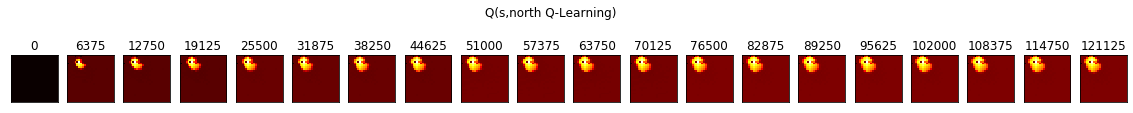

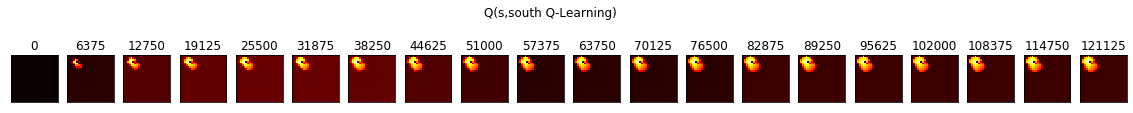

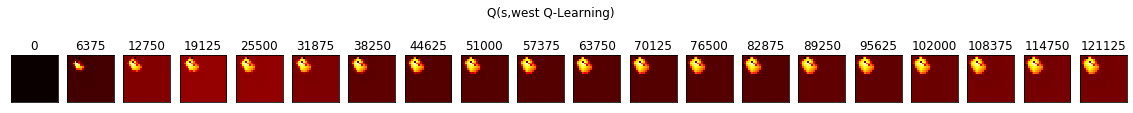

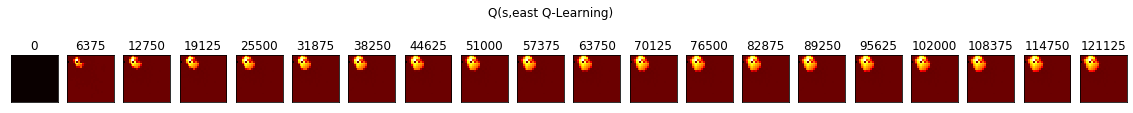

In [19]:
Nsteps = 20
direction = {0: 'north', 1: 'south', 2: 'west', 3: 'east'}
for intdir in range(4):
    fig, ax = plt.subplots(1, Nsteps, figsize=(20,1))
    title = 'Q(s,{})'.format(direction[intdir]+' Q-Learning')
    fig.suptitle(title,y=1.5)

    for i in range(Nsteps):
        interval = len(QhistQlearn)//Nsteps
        heat_plot(QhistQlearn[interval*i][:,:,intdir], ax[i], title='', toggle_numbers = False)
        ax[i].set_title(str(i*interval))
        ax[i].set_xticks([])
        ax[i].set_yticks([])
    plt.show()

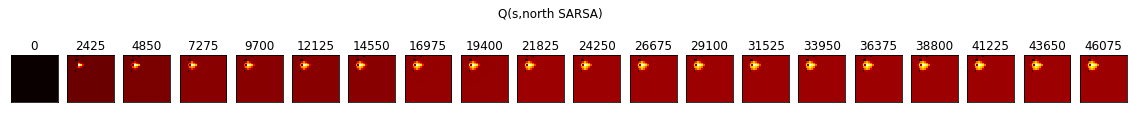

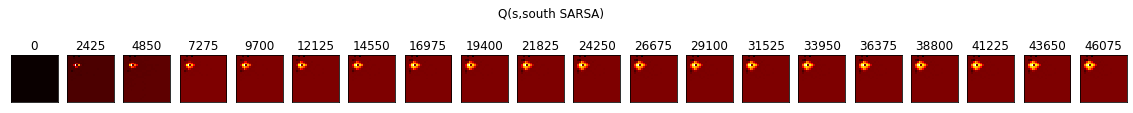

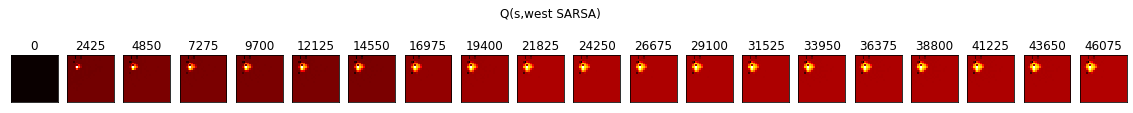

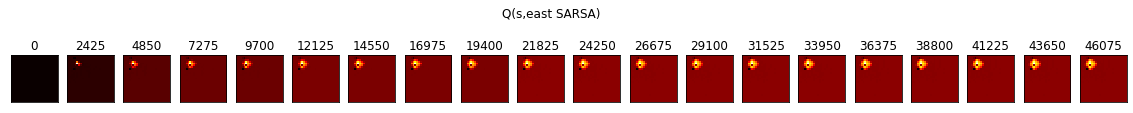

In [20]:
Nsteps = 20
direction = {0: 'north', 1: 'south', 2: 'west', 3: 'east'}
for intdir in range(4):
    fig, ax = plt.subplots(1, Nsteps, figsize=(20,1))
    title = 'Q(s,{})'.format(direction[intdir]+' SARSA')
    fig.suptitle(title,y=1.5)

    for i in range(Nsteps):
        interval = len(QhistSARSA)//Nsteps
        heat_plot(QhistSARSA[interval*i][:,:,intdir], ax[i], title='', toggle_numbers = False)
        ax[i].set_title(str(i*interval))
        ax[i].set_xticks([])
        ax[i].set_yticks([])
    plt.show()